In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_excel('ml_data.xlsx')

In [4]:
df.head()

,Age,Gender,Local Government,Household Size,Transaction Cost,Purchase Type,Product Name,Category,Unit Pack Size,Purchase Frequency
0,44,Female,Kosofe,4,1188,Unit,Noodles,Noodles,100,1
1,44,Female,Kosofe,4,1635,Unit,Spaghetini,Pasta,100,1
2,44,Female,Kosofe,4,2673,Unit,Noodles,Noodles,100,1
3,44,Female,Kosofe,4,2616,Unit,Spaghetini,Pasta,100,1
4,44,Female,Kosofe,4,18000,Unit,Poundo Yam,Ball Foods,1000,1


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
x_train_f = x_train[['Transaction Cost', 'Purchase Type','Unit Pack Size']]
x_test_f = x_test[['Transaction Cost', 'Purchase Type','Unit Pack Size']]

In [7]:
from feature_engine.encoding import OrdinalEncoder


In [8]:
ord = OrdinalEncoder(
    encoding_method='arbitrary',variables=['Purchase Type'])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
x_train.head()

,Age,Gender,Local Government,Household Size,Transaction Cost,Purchase Type,Product Name,Category,Unit Pack Size,Purchase Frequency
9254,38,Male,Eti-Osa,6,1782,Unit,Noodles,Noodles,100,1
1561,48,Female,Shomolu,5,30000,Unit,Poundo Yam,Ball Foods,1000,0
1670,40,Female,Lagos Mainland,4,891,Unit,Noodles,Noodles,100,1
6087,31,Female,Lagos Mainland,2,1442,Unit,Noodles,Noodles,70,0
6669,51,Female,Ibeju-Lekki,5,3000,Unit,Garri,Ball Foods,1000,1


In [11]:
x_train_f = ord.fit_transform(x_train_f)
x_test_f = ord.transform(x_test_f)

In [12]:
ord.encoder_dict_

{'Purchase Type': {'Unit': 0, 'Carton': 1}}

In [13]:
x_train_f

,Transaction Cost,Purchase Type,Unit Pack Size
9254,1782,0,100
1561,30000,0,1000
1670,891,0,100
6087,1442,0,70
6669,3000,0,1000
...,...,...,...
5734,2000,1,50
5191,1648,0,70
5390,9000,0,1000
860,815,0,500


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train_f)
x_test_sc = sc.transform(x_test_f)

In [15]:
x_train_sc_p = pd.DataFrame(x_train_sc, columns=ord.get_feature_names_out())
x_test_sc_p= pd.DataFrame(x_test_sc, columns=ord.get_feature_names_out())

In [16]:
x_train_sc_p.head()

,Transaction Cost,Purchase Type,Unit Pack Size
0,-0.459643,-0.509942,-0.782439
1,1.385895,-0.509942,2.048980
2,-0.517917,-0.509942,-0.782439
3,-0.481880,-0.509942,-0.876820
4,-0.379982,-0.509942,2.048980


In [17]:
x_train_fs = x_train_sc_p
x_test_fs = x_test_sc_p

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

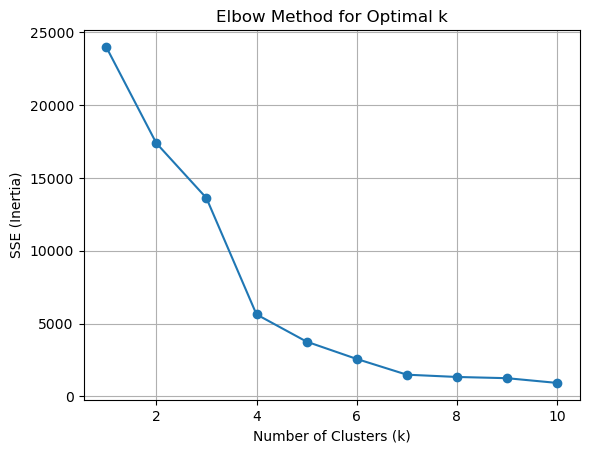

In [19]:
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train_fs)
    sse.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure()
plt.plot(K, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [32]:
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_train_fs)
    silhouette_scores.append(silhouette_score(x_train, labels))

In [33]:
silhouette_scores

[0.4057946826313854,
 0.45175342949796105,
 0.619122917858799,
 0.6849060344811714,
 0.7119663513166328,
 0.7259507321606548,
 0.7209649213226869,
 0.6832374189161894]

In [20]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
x_train_f['Cluster']= kmeans_final.fit_predict(x_train_fs)

In [21]:
x_bar = np.array(x_train_fs)

In [22]:
import seaborn as sns

In [23]:
x_train.head()

,Age,Gender,Local Government,Household Size,Transaction Cost,Purchase Type,Product Name,Category,Unit Pack Size,Purchase Frequency
9254,38,Male,Eti-Osa,6,1782,Unit,Noodles,Noodles,100,1
1561,48,Female,Shomolu,5,30000,Unit,Poundo Yam,Ball Foods,1000,0
1670,40,Female,Lagos Mainland,4,891,Unit,Noodles,Noodles,100,1
6087,31,Female,Lagos Mainland,2,1442,Unit,Noodles,Noodles,70,0
6669,51,Female,Ibeju-Lekki,5,3000,Unit,Garri,Ball Foods,1000,1


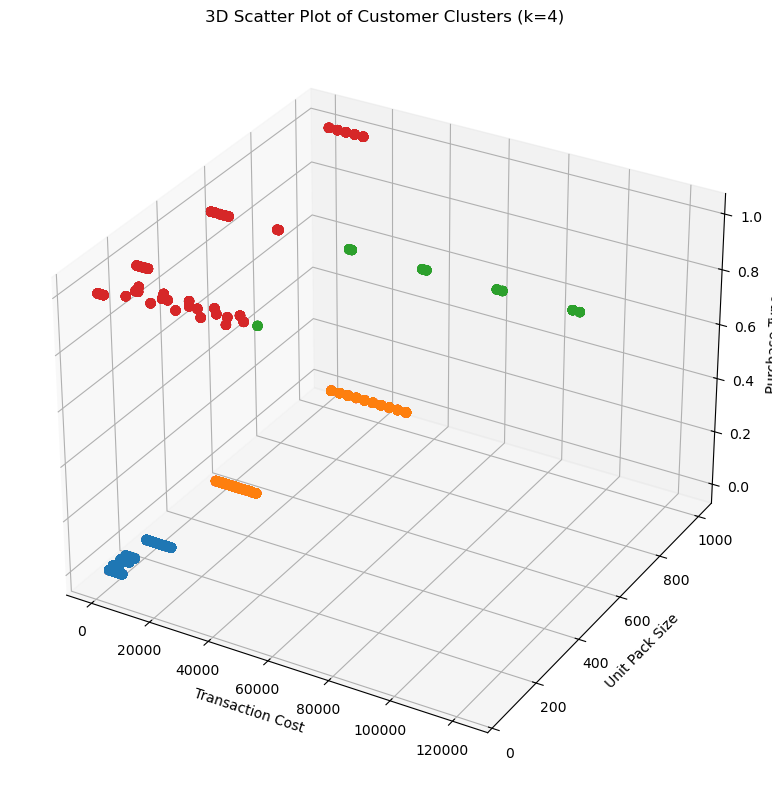

In [25]:
# Use seaborn color palette for consistent coloring
palette = sns.color_palette("tab10", n_colors=4)
colors = [palette[label] for label in x_train_f['Cluster']]

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    x_train_f['Transaction Cost'], 
    x_train_f['Unit Pack Size'], 
    x_train_f['Purchase Type'], 
    c=colors, s=40, alpha=0.7
)

ax.set_xlabel('Transaction Cost')
ax.set_ylabel('Unit Pack Size')
ax.set_zlabel('Purchase Type')
ax.set_title('3D Scatter Plot of Customer Clusters (k=4)')
plt.tight_layout()

### PICKLING

In [26]:
import pickle

In [27]:
import pickle

# Save these 3 objects
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(ord, f)

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans_final, f)


import pickle